In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

array([[ 91,  88,  87, ...,  66,  75,  82],
       [ 91,  89,  88, ...,  68,  78,  84],
       [ 91,  89,  89, ...,  72,  80,  87],
       ...,
       [ 31,  33,  33, ...,  99,  96,  96],
       [ 30,  31,  32, ..., 115, 102,  99],
       [ 29,  31,  31, ..., 135, 124, 106]], dtype=uint8)

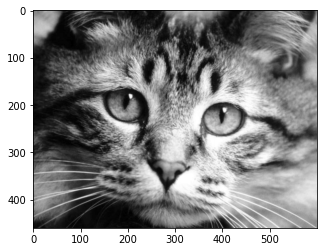

In [3]:
img = cv2.imread("cat.png", 0)
plt.imshow(img,"gray")
img


In [6]:
a, b = 0, 255
c, d = np.min(img), np.max(img)
newimg = (img - c) * ((b - a) / (d - c)) + a

In [7]:
img

array([[ 91,  88,  87, ...,  66,  75,  82],
       [ 91,  89,  88, ...,  68,  78,  84],
       [ 91,  89,  89, ...,  72,  80,  87],
       ...,
       [ 31,  33,  33, ...,  99,  96,  96],
       [ 30,  31,  32, ..., 115, 102,  99],
       [ 29,  31,  31, ..., 135, 124, 106]], dtype=uint8)

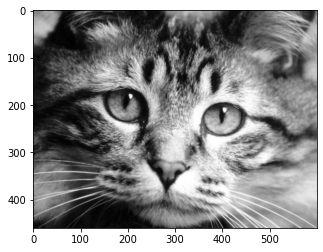

In [8]:
#Q1， here is the new image
plt.imshow(newimg,"gray")

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  131.,
         297., 1730., 4308., 1451., 4635., 1712., 5388., 3435., 1751.,
        5241., 1658., 4968., 2960., 3931., 1281., 1222., 3463., 2181.,
        3266., 1068., 3143., 1104., 1987., 3102., 1078., 3041.,  990.,
        2919., 1921., 1963., 1908.,  921., 2825., 1823., 1998., 2027.,
        1009., 2844., 2022., 3031., 1046., 3175., 1082., 2072., 2118.,
        2144., 3198., 1093., 3363., 1082., 2178., 3227., 1109., 3325.,
        1159., 3431., 2255., 3436., 1193., 1190., 3531., 2435., 3798.,
        1280., 1344., 4163., 3019., 4508., 1497., 4516., 1548., 3066.,
        4560., 1595., 4635., 1541., 4549., 3014., 1421., 4172., 1339.,
        3753., 2437., 3548., 1143., 1182., 3422., 2272., 2357., 2326.,
        3500., 1212., 2327., 2355., 2088., 3054.,  936., 2737.,  823.,
      

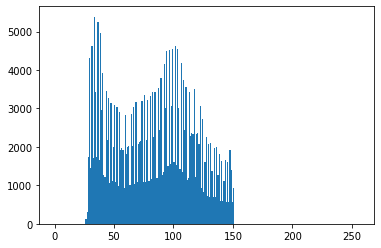

In [9]:
#Q2

hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist = np.bincount(img.ravel(), minlength=256) 
plt.hist(img.ravel(), 256, [0, 256])


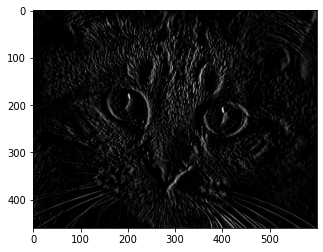

In [10]:

# Q3
#fixed value [[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]] and [[-1, -2, -1],[0, 0, 0],[1, 2, 1]]
sobel_x = cv2.filter2D(img, -1, np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
sobel_y = cv2.filter2D(img, -1, np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]))

plt.imshow(sobel_x, cmap='gray', vmin=0, vmax=255)

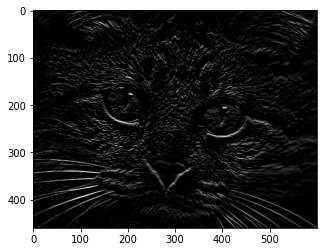

In [11]:
plt.imshow(sobel_y, cmap='gray', vmin=0, vmax=255)

In [12]:
img


array([[ 91,  88,  87, ...,  66,  75,  82],
       [ 91,  89,  88, ...,  68,  78,  84],
       [ 91,  89,  89, ...,  72,  80,  87],
       ...,
       [ 31,  33,  33, ...,  99,  96,  96],
       [ 30,  31,  32, ..., 115, 102,  99],
       [ 29,  31,  31, ..., 135, 124, 106]], dtype=uint8)

In [25]:
#Q4
kernel_size = (15, 15)
#using built_in gaussian blur to blur the img
gauss = cv2.GaussianBlur(img, kernel_size, 60)

#H = I - L
H = cv2.subtract(img, gauss)

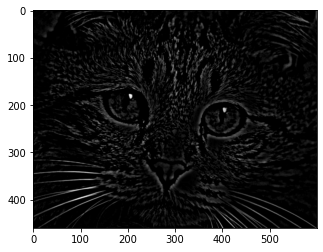

In [26]:
plt.imshow(H, 'gray')

In [27]:
H

array([[ 1,  0,  0, ...,  4, 12, 19],
       [ 1,  0,  0, ...,  6, 15, 21],
       [ 0,  0,  0, ...,  9, 17, 24],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ..., 30, 19,  1]], dtype=uint8)

In [61]:
alpha = 1.1

# I + alpha * H
img4 = img + alpha * H

In [62]:
img4

array([[ 92.1,  88. ,  87. , ...,  70.4,  88.2, 102.9],
       [ 92.1,  89. ,  88. , ...,  74.6,  94.5, 107.1],
       [ 91. ,  89. ,  89. , ...,  81.9,  98.7, 113.4],
       ...,
       [ 31. ,  33. ,  33. , ...,  99. ,  96. ,  96. ],
       [ 30. ,  31. ,  32. , ..., 126. , 102. ,  99. ],
       [ 29. ,  31. ,  31. , ..., 168. , 144.9, 107.1]])

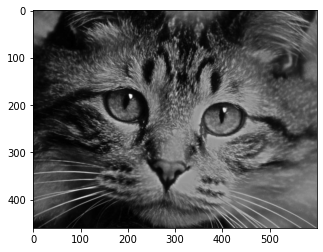

In [63]:
plt.imshow(img4,"gray")

In [64]:
#make it to 0-255
a, b = 0, 255
c, d = np.min(img4), np.max(img4)
img4 = (img4 - c) * ((b - a) / (d - c)) + a

In [65]:
img4

array([[ 80.68693155,  75.68214457,  74.46146482, ...,  54.19818095,
         75.92628052,  93.87027286],
       [ 80.68693155,  76.90282432,  75.68214457, ...,  59.3250359 ,
         83.61656295,  98.99712781],
       [ 79.34418382,  76.90282432,  76.90282432, ...,  68.23599809,
         88.7434179 , 106.68741024],
       ...,
       [  6.10339876,   8.54475826,   8.54475826, ...,  89.10962183,
         85.44758258,  85.44758258],
       [  4.882719  ,   6.10339876,   7.32407851, ..., 122.06797511,
         92.77166108,  89.10962183],
       [  3.66203925,   6.10339876,   6.10339876, ..., 173.33652465,
        145.1388224 ,  98.99712781]])

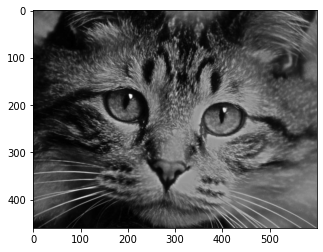

In [66]:
plt.imshow(img4,"gray")

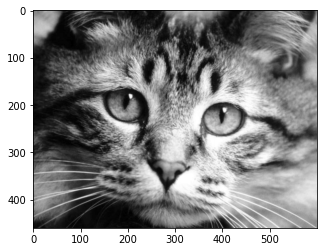

In [67]:
plt.imshow(img,"gray")